In [1]:
import pandas as pd
from matplotlib import pyplot  as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


In [9]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [10]:
legit.shape


(284315, 31)

In [11]:
fraud.shape

(492, 31)

In [12]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample= legit.sample(n=492) # Randomly selects 492 legitimate transactions (equal to the number of fraud cases).taking fraud ttransaction n=492 as it is fewer than legit so using legit would make data biased

In [15]:
df_new= pd.concat([legit_sample, fraud], axis=0) #to create 50:50 ratio to balance the both legit and fraid dataset

In [16]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45515,42383.0,-0.842556,0.514444,0.268323,-0.565721,2.200279,4.015541,0.209161,0.567959,0.073343,...,-0.313654,-0.707572,-0.053459,1.038819,-0.108379,0.354737,-0.533626,-0.150339,49.99,0
219605,141799.0,-2.293732,2.057486,-1.602484,-1.094931,0.351448,-0.921233,-0.958996,-3.930687,-0.120067,...,0.628832,0.923361,0.152382,-0.133445,-0.569680,-0.514934,-0.349037,-0.088079,17.90,0
258917,158877.0,-1.452245,-0.200329,-0.551542,-1.022190,2.875738,-2.022647,0.970844,-0.171476,-0.484130,...,0.184980,0.079774,-0.222953,0.535467,0.746802,0.521154,-0.087945,0.134269,22.79,0
85572,60833.0,1.193025,-0.323700,0.670139,0.387336,-0.236840,1.243916,-0.870196,0.472990,0.833438,...,-0.107131,-0.128439,-0.108667,-1.281555,0.313890,0.413300,0.024975,-0.001204,6.89,0
83190,59725.0,1.139596,-0.223037,0.864204,1.532395,-0.356859,1.057418,-0.592799,0.371327,1.401251,...,-0.477993,-0.922207,-0.011722,-0.788459,0.517043,-0.454987,0.086466,0.018691,9.89,0


In [17]:
df_new["Class"].value_counts()

,count
Class,
0,492
1,492


In [18]:
X= df_new.drop(columns='Class', axis=1) # will drop class column from dataset
y= df_new['Class'] #since class is target variable  it will contain both legit and fraud data corresponding to each row

In [19]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2) #stratify y to preserve the distribution of the target variable (y) across the training and test sets

In [20]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(787, 30) (787,) (197, 30) (197,)


In [21]:
lm = LogisticRegression()

In [22]:
lm.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
X_train_predict=lm.predict(X_train)
train_accuracy=accuracy_score(X_train_predict,Y_train)

In [24]:
print("accuracy:",train_accuracy)

accuracy: 0.9479034307496823


In [25]:
X_test_predict=lm.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)
print("accuracy:",test_accuracy)


accuracy: 0.934010152284264


x is other feature and y is target feature so training is evaluating accuracy of old data where testing is accuracy of unseen data  we compare accuracy of unseen data with old data to see how much accurate is new data
we check accuracy.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [28]:
X = data[['Amount']]  # Double brackets to keep it a dataframe
y = data['V1']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Mean Squared Error: 3.68
Coefficient (slope): -0.00
Intercept: 0.16


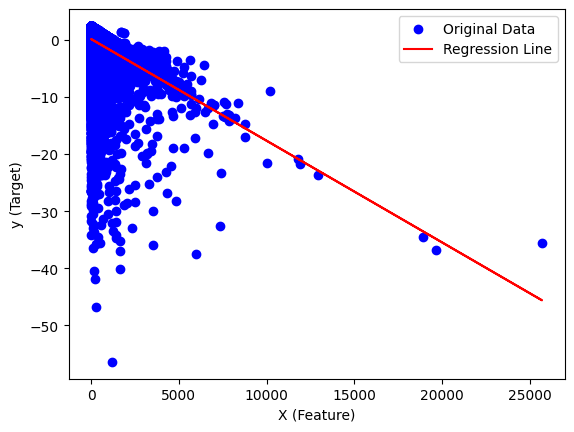

In [33]:
plt.scatter(X, y, color='blue', label="Original Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.show()